# **Lending Club Case Study**

**DATA WRANGLING**

*Data*

We have used the Private Data of Lending Club.
The complete loan data for all loans issued through the time period 2012 to 2018 was used.

We also have a data dictionary which describes the meaning of these variables.

Let's start with importing all the required libraries for the analysis.

In [1]:
#Importing Required libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from scipy import stats
#from pandas_profiling import ProfileReport
sns.set(style='whitegrid')


%matplotlib inline
 
rcParams['figure.figsize'] = 14,6
 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#Kaggle was used because of performance on local device performance issues

/kaggle/input/lcdatadictionaryxlsx/LCDataDictionary.xlsx
/kaggle/input/lending-club/accepted_2007_to_2018Q4.csv.gz
/kaggle/input/lending-club/rejected_2007_to_2018Q4.csv.gz
/kaggle/input/lending-club/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv
/kaggle/input/lending-club/rejected_2007_to_2018q4.csv/rejected_2007_to_2018Q4.csv


In [2]:
#LOADING LENDING CLUB LOAN DATA
unedited = pd.read_csv('/kaggle/input/lending-club/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv', low_memory = False)

In [3]:
#Checking data
#pd.options.display.max_rows = 1000
df = unedited
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


**Feature Description**

In [4]:
#LOADING FEATURE DESCRIPTION
exc = pd.read_excel('/kaggle/input/lcdatadictionaryxlsx/LCDataDictionary.xlsx').dropna()
pd.options.display.max_colwidth =100
exc.set_index('LoanStatNew', inplace=True)
exc

,Description
LoanStatNew,
acc_now_delinq,The number of accounts on which the borrower is now delinquent.
acc_open_past_24mths,Number of trades opened in past 24 months.
addr_state,The state provided by the borrower in the loan application
all_util,Balance to credit limit on all trades
annual_inc,The self-reported annual income provided by the borrower during registration.
...,...
settlement_status,"The status of the borrower’s settlement plan. Possible values are: COMPLETE, ACTIVE, BROKEN, CAN..."
settlement_date,The date that the borrower agrees to the settlement plan
settlement_amount,The loan amount that the borrower has agreed to settle for


**Data Cleaning**

Checking Data for null values and data types. Since data shape is very large descibe() functionality wasn't applied.

In [5]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 151 columns):
 #   Column                                      Non-Null Count    Dtype  
---  ------                                      --------------    -----  
 0   id                                          2260701 non-null  object 
 1   member_id                                   0 non-null        float64
 2   loan_amnt                                   2260668 non-null  float64
 3   funded_amnt                                 2260668 non-null  float64
 4   funded_amnt_inv                             2260668 non-null  float64
 5   term                                        2260668 non-null  object 
 6   int_rate                                    2260668 non-null  float64
 7   installment                                 2260668 non-null  float64
 8   grade                                       2260668 non-null  object 
 9   sub_grade                                   2260668 non-

Checking for Missing Values Percentage for each feature or columns and showing columns with missing values.

In [6]:
#CREATING FUNCTION FOR CHECKING MISSING FEATURES BASED ON PERCENTAGE OF FEATURE MISSING
def miss_features(df,perc=0):
    missing = round(100*(df.isnull().sum()/len(df.id)), 2)
    missing_perc = pd.DataFrame(missing.loc[missing>perc])
    return missing_perc

In [7]:
#LIST OF ALL FEATURES WITH MISSING DATA
pd.options.display.max_rows = 1000
missing_perc = miss_features(df)
print("Number of features with missing values", len(missing_perc[0]))
print(missing_perc)

Number of features with missing values 102
                                                 0
member_id                                   100.00
emp_title                                     7.39
emp_length                                    6.50
desc                                         94.42
title                                         1.03
dti                                           0.08
mths_since_last_delinq                       51.25
mths_since_last_record                       84.11
revol_util                                    0.08
last_pymnt_d                                  0.11
next_pymnt_d                                 59.51
collections_12_mths_ex_med                    0.01
mths_since_last_major_derog                  74.31
annual_inc_joint                             94.66
dti_joint                                    94.66
verification_status_joint                    94.88
tot_coll_amt                                  3.11
tot_cur_bal                            

In [8]:
#Fuction to check feature information

def feat_info(df,a=0):
    tmp = {}
    for i in df:
        try:
            tmp[i] = exc.loc[i]
        except:
            if (a==0):
                tmp[i] = "Not Found"
            else:
                pass
    pd.set_option('display.max_colwidth', 0)
    return pd.DataFrame.from_dict(tmp).T

In [9]:
#NUMBER OF MISSING COLUMNS
columns_with_missing_values = list(missing_perc[missing_perc > 0].index)
print(len(columns_with_missing_values))

102


In [10]:
#DESCRIPTION OF MISSING FEATURES
feat_info(columns_with_missing_values)

,Description
member_id,A unique LC assigned Id for the borrower member.
emp_title,The job title supplied by the Borrower when applying for the loan.*
emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
desc,Loan description provided by the borrower
title,The loan title provided by the borrower
dti,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
mths_since_last_delinq,The number of months since the borrower's last delinquency.
mths_since_last_record,The number of months since the last public record.
revol_util,"Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit."
last_pymnt_d,Last month payment was received


Following features were without any information and cannot be imputed for their missing values too since values are mostly applicant dependent, so they will be dropped:

* 'total_rev_hi_lim'
* 'verification_status_joint'
* 'revol_bal_joint'
* 'sec_app_fico_range_low'
* 'sec_app_fico_range_high'
* 'sec_app_earliest_cr_line'
* 'sec_app_inq_last_6mths'
* 'sec_app_mort_acc'
* 'sec_app_open_acc'
* 'sec_app_revol_util'
* 'sec_app_num_rev_accts'
* 'sec_app_chargeoff_within_12_mths'
* 'sec_app_collections_12_mths_ex_med'
* 'sec_app_mths_since_last_major_derog'

In [11]:
col_to_drop = ['total_rev_hi_lim','verification_status_joint','revol_bal_joint','sec_app_fico_range_low','sec_app_fico_range_high','sec_app_earliest_cr_line','sec_app_inq_last_6mths',
'sec_app_mort_acc','sec_app_open_acc','sec_app_revol_util','sec_app_num_rev_accts','sec_app_chargeoff_within_12_mths','sec_app_collections_12_mths_ex_med','sec_app_mths_since_last_major_derog']
df = df.drop(col_to_drop,axis=1)
df.shape

(2260701, 137)

In [12]:
#Features with missing values remaining
missing_perc = miss_features(df)
print("Number of features with missing data: ", len(missing_perc[0]))
print(missing_perc)

Number of features with missing data:  88
                                                 0
member_id                                   100.00
emp_title                                   7.39  
emp_length                                  6.50  
desc                                        94.42 
title                                       1.03  
dti                                         0.08  
mths_since_last_delinq                      51.25 
mths_since_last_record                      84.11 
revol_util                                  0.08  
last_pymnt_d                                0.11  
next_pymnt_d                                59.51 
collections_12_mths_ex_med                  0.01  
mths_since_last_major_derog                 74.31 
annual_inc_joint                            94.66 
dti_joint                                   94.66 
tot_coll_amt                                3.11  
tot_cur_bal                                 3.11  
open_acc_6m                             

There are columns in the data with 100% missing values. Removing all the columns with more than 50% missing values. On further checking for missing values it was found that variable with missing data can't be imputed as they are observation/applicant dependent and any imputation will increase bias in data, and if they are dropped more than 50% of observations for all features will be lost, so on further consideration features with 30% missing values will be dropped. There were 58 columns with more than 30% values as missing. Removing such columns as these columns mostly add noise and wont help in analysis.

In [13]:
#List of features with more than 30% missing data
miss_30 = miss_features(df,perc=30)
list_m30 = list(miss_30[miss_30 >= 30].index)
len(list_m30)

45

In [14]:
df = df.drop(list_m30,axis=1)
df.shape

(2260701, 92)

Checking remaining missing data featuers. After removing such columns 92 columns remain. Let's examine further for missing values. Checking percentage of data missing for remaining features.

In [15]:
miss_feat = miss_features(df)
print(miss_feat)

                                0
emp_title                   7.39 
emp_length                  6.50 
title                       1.03 
dti                         0.08 
revol_util                  0.08 
last_pymnt_d                0.11 
collections_12_mths_ex_med  0.01 
tot_coll_amt                3.11 
tot_cur_bal                 3.11 
acc_open_past_24mths        2.21 
avg_cur_bal                 3.11 
bc_open_to_buy              3.32 
bc_util                     3.37 
chargeoff_within_12_mths    0.01 
mo_sin_old_il_acct          6.15 
mo_sin_old_rev_tl_op        3.11 
mo_sin_rcnt_rev_tl_op       3.11 
mo_sin_rcnt_tl              3.11 
mort_acc                    2.21 
mths_since_recent_bc        3.25 
mths_since_recent_inq       13.07
num_accts_ever_120_pd       3.11 
num_actv_bc_tl              3.11 
num_actv_rev_tl             3.11 
num_bc_sats                 2.59 
num_bc_tl                   3.11 
num_il_tl                   3.11 
num_op_rev_tl               3.11 
num_rev_accts 

In [16]:
#Checking features cardinality of missing data columns to drop further values.
miss_list = miss_feat.index.tolist()
s = df[miss_list].nunique()
mer = (miss_feat.merge(s.rename('N_unique'), left_index=True, right_index=True)).merge(feat_info(miss_list), left_index=True, right_index=True)
pd.set_option('display.max_colwidth', 0)
mer

,0,N_unique,Description
emp_title,7.39,512694,The job title supplied by the Borrower when applying for the loan.*
emp_length,6.50,11,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
title,1.03,63155,The loan title provided by the borrower
dti,0.08,10845,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
revol_util,0.08,1430,"Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit."
last_pymnt_d,0.11,136,Last month payment was received
collections_12_mths_ex_med,0.01,16,Number of collections in 12 months excluding medical collections
tot_coll_amt,3.11,15574,Total collection amounts ever owed
tot_cur_bal,3.11,487688,Total current balance of all accounts
acc_open_past_24mths,2.21,57,Number of trades opened in past 24 months.


In [17]:
#Features with less than 20 unique values and high % missing data
for i in miss_list:
    if len(df[i].unique())<20:
           print("Number of Unique values for {} : {} \n{} \n\n".format(i, len(df[i].unique()), feat_info([i])['Description'][0]))

Number of Unique values for emp_length : 12 
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.  


Number of Unique values for collections_12_mths_ex_med : 17 
Number of collections in 12 months excluding medical collections 


Number of Unique values for chargeoff_within_12_mths : 12 
Number of charge-offs within 12 months 


Number of Unique values for num_tl_120dpd_2m : 8 
Number of accounts currently 120 days past due (updated in past 2 months) 


Number of Unique values for num_tl_30dpd : 6 
Number of accounts currently 30 days past due (updated in past 2 months) 


Number of Unique values for pub_rec_bankruptcies : 13 
Number of public record bankruptcies 




In [18]:
#CHecking values of Features with less than 20 unique values and high % missing data
for i in miss_list:
    if len(df[i].unique())<20:
        print("Unique values for {} : {} \n{} \n\n".format(i, df[i].unique(),feat_info([i])['Description'][0]))

Unique values for emp_length : ['10+ years' '3 years' '4 years' '6 years' '1 year' '7 years' '8 years'
 '5 years' '2 years' '9 years' '< 1 year' nan] 
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.  


Unique values for collections_12_mths_ex_med : [ 0.  1.  2.  3.  4.  5.  7. 10.  6. 14. nan  8. 20.  9. 11. 12. 16.] 
Number of collections in 12 months excluding medical collections 


Unique values for chargeoff_within_12_mths : [ 0.  1.  2.  3.  6.  7.  4.  5.  9. 10. nan  8.] 
Number of charge-offs within 12 months 


Unique values for num_tl_120dpd_2m : [ 0. nan  1.  2.  6.  3.  7.  4.] 
Number of accounts currently 120 days past due (updated in past 2 months) 


Unique values for num_tl_30dpd : [ 0.  1.  2.  4.  3. nan] 
Number of accounts currently 30 days past due (updated in past 2 months) 


Unique values for pub_rec_bankruptcies : [ 0.  1.  2.  3.  8.  4.  6.  5.  7.  9. 11. nan 12.] 
Number of 

The columns collections_12_mths_ex_med categorical columns take is not of any significant impact to the analysis since we already have column for collections.
We can decide to drop this column for analysis.

In [19]:
drop_columnlist = ['collections_12_mths_ex_med']
df = df.drop(drop_columnlist,axis=1)
df.shape

(2260701, 91)

In [20]:
#Checking features still left with missing values, for further deliberation whether values could be imputed or not.
print(miss_features(df,5))

                           0
emp_title              7.39 
emp_length             6.50 
mo_sin_old_il_acct     6.15 
mths_since_recent_inq  13.07
num_tl_120dpd_2m       6.80 


The columns emp_title, emp_length, mo_sin_old_il_acct, mths_since_recent_inq and num_tl_120dpd_2m have 7.39%, 6.50%, 6.15%, 13.07%, 6.08% missing value. These columns have information about the customer/borrower like their job title and their employment length in years. Let's remove the rows with nan/blank values for these variables. Other variables have very less data missing compared to total data size. So, let's remove the rows with the missing features. Many features are similar that would impact our analysis negatively, so they are removed. 

In [21]:
loan = df.dropna()
loan.shape

(1652452, 91)

Now, we have reduced the data set to have 1652452 loan records and 91 attributes with no missing values.

# EXPLORATORY DATA ANALYSIS (EDA)

We are trying to answer many questions such as:

* What's the distribution of Loan Status?
* What's the distribution of Amount of loans?
* What's the distribution of Interest Rate?
* What's the % of Defaults in loans?
* What's the most common grades?
* What's the most common employer titles?
* What's the most common Purpose that a client request a loan?
* What's the different between Terms?
* And a lot of other questions that will raise through the exploration


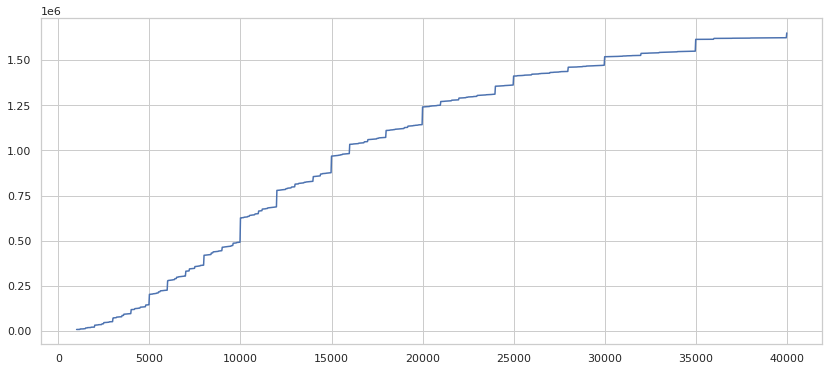

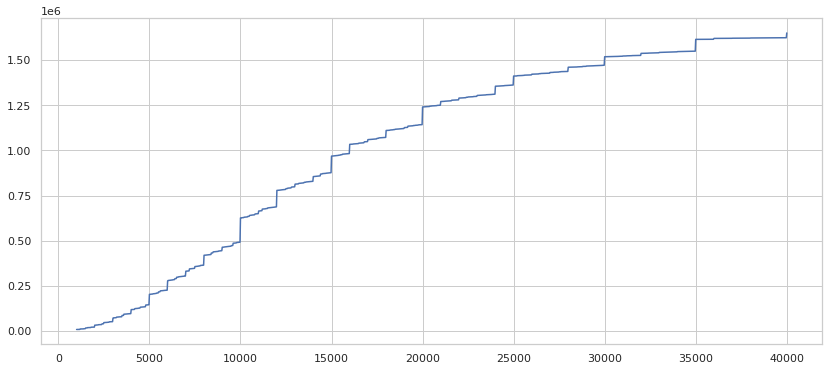

In [22]:
list_pdf = ['loan_amnt','funded_amnt']
for i in list_pdf:
    cdf = loan[i].value_counts().sort_index().cumsum()
    cdf.plot()
    plt.show()

Our aim is to predict whether the loan will default or not based on our data.
So, let's understand which type of category values we have and which loans to select loans
that are fully paid and that are not fully paid, removing current loans

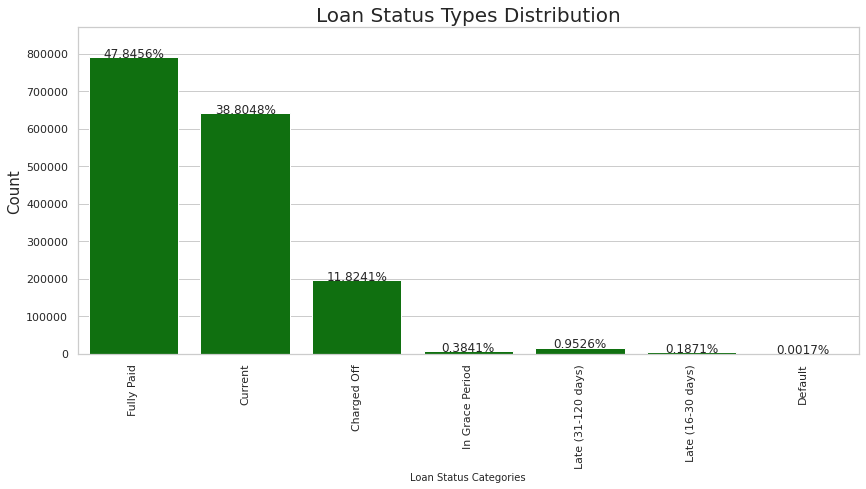

In [23]:
#Loand status distribution
total = len(loan)

plt.figure(figsize = (14,6))

g = sns.countplot(x="loan_status", data=loan, color='green')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Loan Status Categories", fontsize=10)
g.set_ylabel("Count", fontsize=15)
g.set_title("Loan Status Types Distribution", fontsize=20)

sizes = []

for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.4f}%'.format(height/total*100),ha="center", fontsize=12) 
g.set_ylim(0, max(sizes) * 1.10)

plt.show()

In [24]:
#Different status of loans
loan['loan_status'].unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default'], dtype=object)

We need to predict if loan will default or will be fully paid based on the features. Chrged off and Default will be combined later as a single status.

In [25]:
final_loan = loan.loc[loan['loan_status'].isin(['Fully Paid', 'Charged Off', 'Default'])]
final_loan.shape

(986041, 91)

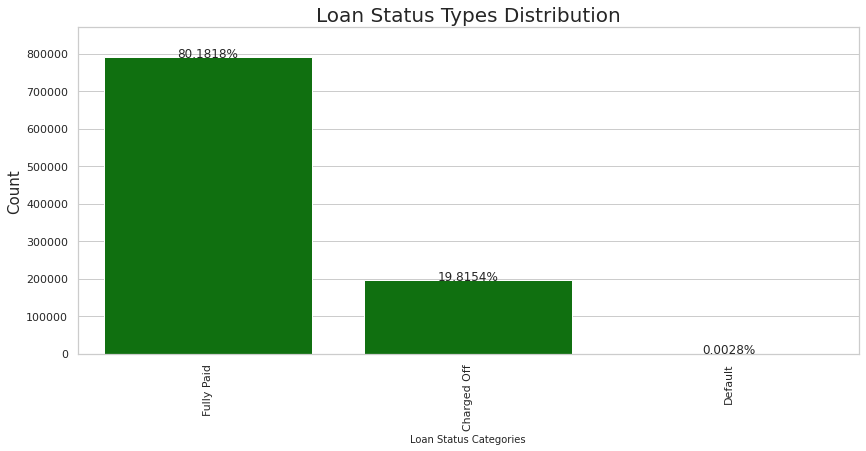

In [26]:
total = len(final_loan)

plt.figure(figsize = (14,6))

g = sns.countplot(x="loan_status", data=final_loan, color='green')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Loan Status Categories", fontsize=10)
g.set_ylabel("Count", fontsize=15)
g.set_title("Loan Status Types Distribution", fontsize=20)

sizes = []

for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.4f}%'.format(height/total*100),ha="center", fontsize=12) 
g.set_ylim(0, max(sizes) * 1.10)

plt.show()

**Purpose of Loan**


Purpose - A category provided by the borrower for the loan request.
As it a categorical feature that says what's the purpose to the loan, would be interesting to start by Purpose.

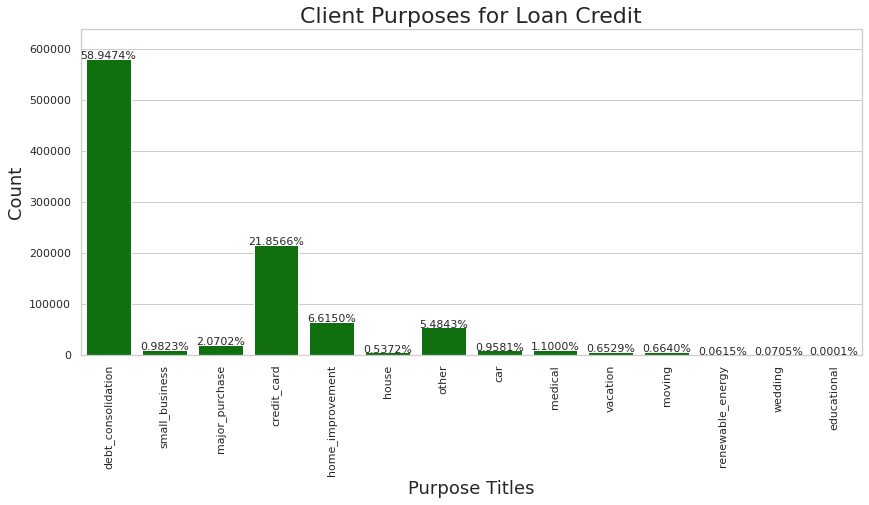

In [27]:
plt.figure(figsize=(14,6))

g = sns.countplot(x='purpose', data=final_loan, color='green')
g.set_title("Client Purposes for Loan Credit", fontsize=22)
g.set_xlabel("Purpose Titles", fontsize=18)
g.set_ylabel('Count', fontsize=18)

sizes=[]

for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.4f}%'.format(height/total*100),ha="center", fontsize=11) 
    
g.set_ylim(0, max(sizes) * 1.10)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.show()

**The top 3 purposes are:**

* 58.94% of the Loans are to Debt Consolidation
* 21.85% are to pay Credit Card
* 6.61% to Home Improvement
* and many others purposes that sums 12.60%

**LOAN AMOUNT and INTEREST RATE Distributions**

**Loan Amount** - The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

**intRate** - Interest Rate on the loan

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


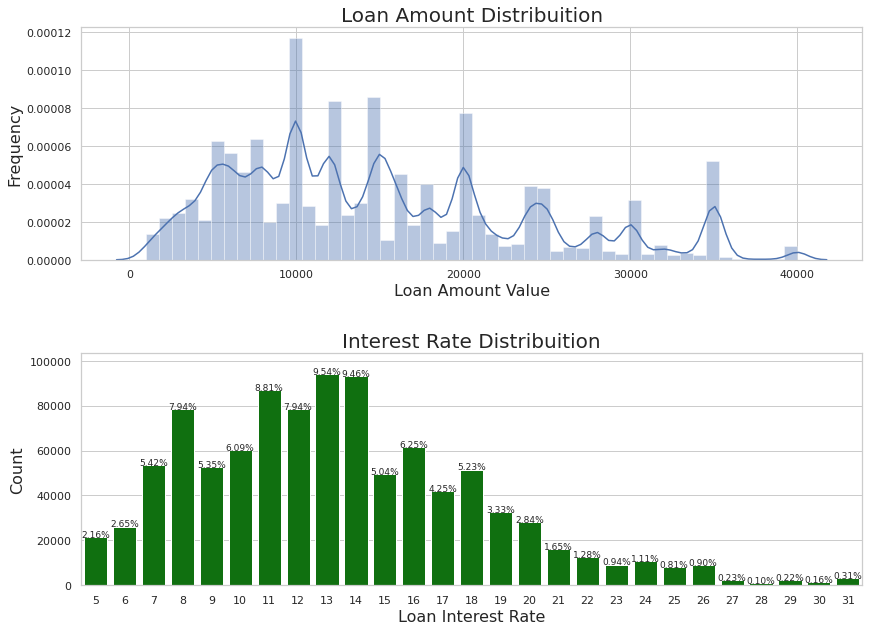

In [28]:
final_loan['int_round'] = final_loan['int_rate'].round(0).astype(int)

#I will start looking the loan_amnt column
plt.figure(figsize=(14,10))

# Loan Amt plot
plt.subplot(211)
g = sns.distplot(final_loan["loan_amnt"])
g.set_xlabel("Loan Amount Value", fontsize=16)
g.set_ylabel("Frequency", fontsize=16)
g.set_title("Loan Amount Distribuition", fontsize=20)

## Interest plot
plt.subplot(212)
g1 = sns.countplot(x="int_round", data=final_loan, color='green')
g1.set_xlabel("Loan Interest Rate", fontsize=16)
g1.set_ylabel("Count", fontsize=16)
g1.set_title("Interest Rate Distribuition", fontsize=20)

sizes=[] # Get highest values in y

for p in g1.patches:
    height = p.get_height()
    sizes.append(height)
    g1.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}%'.format(height/total*100),ha="center", fontsize=9) 

g1.set_ylim(0, max(sizes) * 1.10) # set y limit based on highest heights

plt.subplots_adjust(hspace = 0.4,top = 0.9)

plt.show()

In [29]:
final_loan['issue_month'], final_loan['issue_year'] = final_loan['issue_d'].str.split('-', 1).str

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


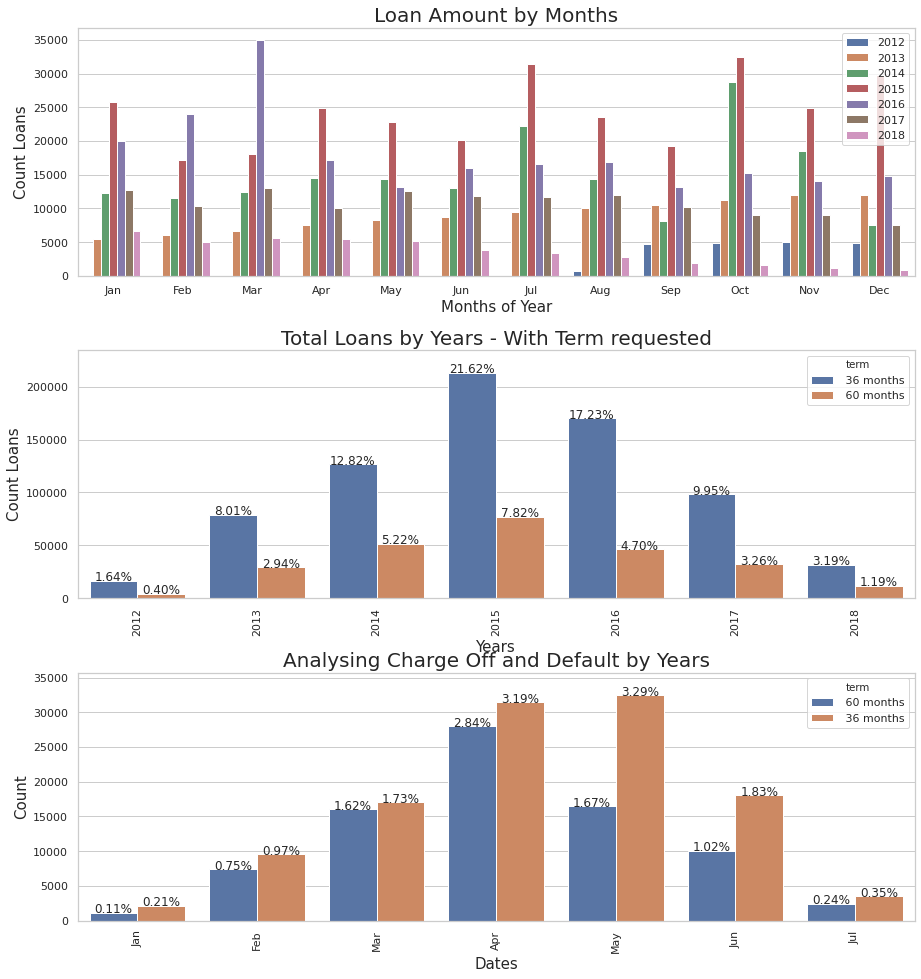

In [30]:
months_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

final_loan['issue_month'] = pd.Categorical(final_loan['issue_month'],categories=months_order,ordered=True)


plt.figure(figsize = (15,16))

#Issue_d x loan_amount
plt.subplot(311)
g = sns.countplot(x='issue_month', hue='issue_year', data=final_loan)
#g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Months of Year", fontsize=15)
g.set_ylabel("Count Loans", fontsize=15)
g.legend(loc='best')
g.set_title("Loan Amount by Months", fontsize=20)


#Looking the count of defaults though the issue_d that is The month which the loan was funded
plt.subplot(312)
g1 = sns.countplot(x='issue_year', hue='term', data=final_loan)
g1.set_xticklabels(g1.get_xticklabels(),rotation=90)
g1.set_xlabel("Years", fontsize=15)
g1.set_ylabel("Count Loans", fontsize=15)
g1.set_title("Total Loans by Years - With Term requested", fontsize=20)
sizes=[]
for p in g1.patches:
    height = p.get_height()
    sizes.append(height)
    g1.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}%'.format(height/total*100),ha="center", fontsize=12) 
g1.set_ylim(0, max(sizes) * 1.10)


#Looking the count of defaults though the issue_d that is The month which the loan was funded
plt.subplot(313)
g2 = sns.countplot(x='issue_year', data=final_loan.loc[(final_loan['loan_status'] == 'Charged Off') | (final_loan['loan_status'] == 'Default')],hue='term')
g2.set_xticklabels(g.get_xticklabels(),rotation=90)
g2.set_xlabel("Dates", fontsize=15)
g2.set_ylabel("Count", fontsize=15)
g2.set_title("Analysing Charge Off and Default by Years", fontsize=20)


sizes=[]
for p in g2.patches:
    height = p.get_height()
    sizes.append(height)
    g2.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}%'.format(height/total*100),ha="center", fontsize=12) 
g2.set_ylim(0, max(sizes) * 1.10)

plt.subplots_adjust(hspace = 0.3,top = 0.9)

plt.show()


We can note that the peak of loans was in March 2016. Going depth in the default exploration to see the amount and counting though the ISSUE_D ,
that is: The month which the loan was funded

**Crosstab - Purpose by Loan Status**

In [31]:
#Exploring the loan_status by purpose
purp_loan= ['purpose', 'loan_status']
cm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(final_loan[purp_loan[0]], final_loan[purp_loan[1]],normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

loan_status,Charged Off,Default,Fully Paid
purpose,,,
car,0.710000,7.140000,1.020000
credit_card,18.430000,17.860000,22.700000
debt_consolidation,62.370000,57.140000,58.100000
educational,0.000000,0.000000,0.000000
home_improvement,5.830000,3.570000,6.810000
house,0.590000,3.570000,0.520000
major_purchase,2.000000,3.570000,2.090000
medical,1.180000,7.140000,1.080000
moving,0.790000,0.000000,0.630000


**Crosstab - Loan Status by Grade**

In [32]:
loan_grade = ['loan_status', 'grade']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(final_loan[loan_grade[0]], final_loan[loan_grade[1]]).style.background_gradient(cmap = cm)

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,9307,36463,62861,44757,27288,11107,3605
Default,4,6,5,9,4,0,0
Fully Paid,154854,247683,222989,104465,43535,13488,3611


**Interest Rate by Grade and Loan_status**

In [33]:
loan_grade = ['loan_status', 'grade']
cm = sns.light_palette("green", as_cmap=True)
round(pd.crosstab(final_loan[loan_grade[0]], final_loan[loan_grade[1]],values=final_loan['int_rate'], aggfunc='mean'),2).fillna(0).style.background_gradient(cmap = cm)

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,7.400000,10.780000,14.090000,17.800000,21.190000,25.190000,28.080000
Default,7.190000,11.040000,14.110000,19.050000,25.150000,0.000000,0.000000
Fully Paid,7.100000,10.640000,14.020000,17.750000,21.250000,25.090000,27.870000


**Crosstab - Loan Status by Application Type**

In [34]:
loan_application = ['loan_status', 'application_type']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(final_loan[loan_application[0]], final_loan[loan_application[1]]).style.background_gradient(cmap = cm)

application_type,Individual,Joint App
loan_status,,
Charged Off,191039,4349
Default,24,4
Fully Paid,776333,14292


**Employment Features**

Ranking job title based on professionals requiring loan. Many similar professional titles are available for a same job profile which may lead to ambiguity of the feature.

In [35]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
from collections import Counter

In [36]:
trace0 = go.Bar(
    x = final_loan.emp_title.value_counts()[:40].index.values,
    y = final_loan.emp_title.value_counts()[:40].values,
    marker=dict(color=final_loan.emp_title.value_counts()[:40].values))

data = [trace0]

layout = go.Layout(yaxis=dict(title='Count'),xaxis=dict(title='Employment name'),title='TOP 40 Employment Title')

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='emp-title-bar')

Teachers seems to be highest count for borrowers followed by Manager and Owner.

Ranking loan creditors based on the number of employment years.

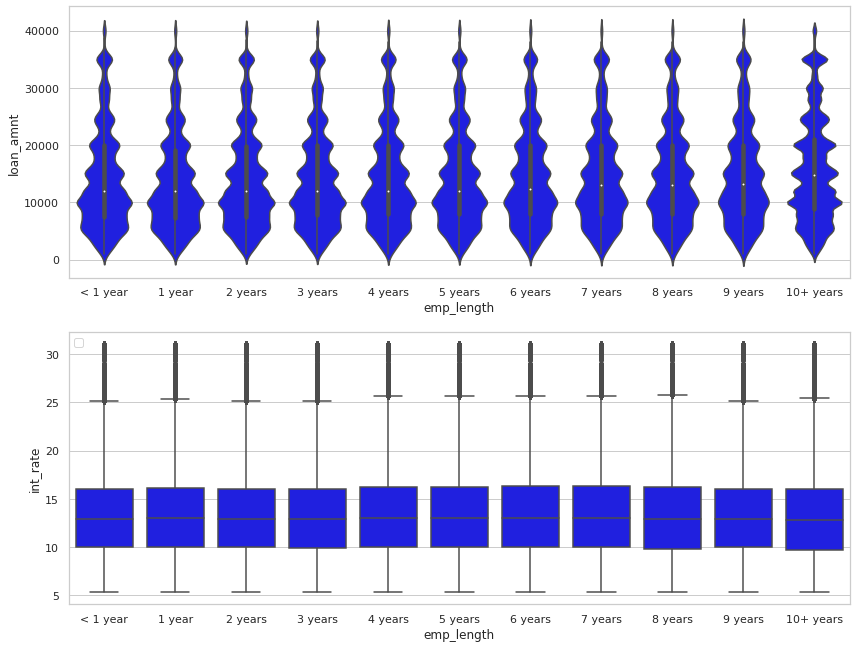

In [37]:
emp_ord = ['< 1 year', '1 year', '2 years', '3 years',
           '4 years', '5 years', '6 years', '7 years',
           '8 years', '9 years', '10+ years']

fig, ax = plt.subplots(2,1, figsize=(14,11))

z = sns.violinplot(x="emp_length", y="loan_amnt",data=final_loan, 
                   ax=ax[0], color='blue',
                   order=emp_ord)

g = sns.boxplot(x="emp_length", y="int_rate", data=final_loan,
                ax=ax[1], color='blue',
                order=emp_ord)


               
plt.legend(loc='upper left')
plt.show()

We can see that the years do not influence the interest rate but they have a slight difference considering the loan_amount patterns

**Cross Tab of - State and Loan Status**

In [38]:
#States wrt to loan status
adress_loan = ['addr_state', 'loan_status']
cm = sns.light_palette("green", as_cmap=True)
round(pd.crosstab(final_loan[adress_loan[0]], 
                  final_loan[adress_loan[1]], 
                  normalize='all')*100,2).style.background_gradient(cmap = cm)

loan_status,Charged Off,Default,Fully Paid
addr_state,,,
AK,0.050000,0.000000,0.200000
AL,0.280000,0.000000,0.950000
AR,0.180000,0.000000,0.580000
AZ,0.470000,0.000000,1.990000
CA,2.760000,0.000000,11.390000
CO,0.310000,0.000000,1.650000
CT,0.260000,0.000000,1.230000
DC,0.030000,0.000000,0.200000
DE,0.060000,0.000000,0.230000


We can see California, Florida, Illinois and Texas have higest borrowers.

#  **PREPROCESSING AND TRAINING DATA DEVELOPMENT**

We will be checking every feature and considering whether they'll impact on the model we'll managing the features. 

In [39]:
loan.nunique().sort_values()

policy_code                   1      
debt_settlement_flag          2      
disbursement_method           2      
application_type              2      
pymnt_plan                    2      
initial_list_status           2      
hardship_flag                 2      
term                          2      
verification_status           3      
num_tl_30dpd                  5      
home_ownership                6      
grade                         7      
num_tl_120dpd_2m              7      
loan_status                   7      
inq_last_6mths                9      
acc_now_delinq                9      
chargeoff_within_12_mths      10     
emp_length                    11     
pub_rec_bankruptcies          12     
purpose                       14     
mths_since_recent_inq         25     
num_tl_op_past_12m            31     
num_tl_90g_dpd_24m            32     
delinq_2yrs                   34     
sub_grade                     35     
num_actv_bc_tl                36     
fico_range_l

There are a few columns having a single unique value or all unique values. These may have nothing much to contribute to the analysis i.e. columns which are far from being the driving columns towards loan default. Some other columns are redundant.

These columns are:

* id :
is a random number given to the loan, does not contribute to analysis
* pymnt_plan :
value for entire dataset is 'n', therefore can be removed.
* url :
is a URL for LC page for corresponding to each memberid, nothing to do with loan default.
* zip_code :
first 3 digits of the 5 digit zip code are visible, also is redundant with addr_state, does not contribute to analysis
* initial_list_status :
value for entire dataset is 'f' out of the possible values, therefore can be removed.
* policy_code :
value for entire dataset is '1', indicating all are publicly available, therefore nothing to contribute for analysis, to be removed.
* application_type :
value for entire dataset is 'INDIVIDUAL', indicating all are individual applications not joint, therefore nothing to contribute for analysis, to be removed.
* acc_now_delinq :
value for entire dataset is '0', therefore can be removed.
* delinq_amnt :
value for entire dataset is '0', therefore can be removed.
* funded_amnt :
value for this column is almost equivalent to loan_amnt. removing to avoid multi colinearity.
* funded_amnt_inv :
value for this column is almost equivalent to funded_amnt. removing to avoid multi colinearity. Also this wont be available at the time of decision making of funding a loan.
Dropping the above columns from the clean_loan dataframe.

In [40]:
columns_tobe_dropped = ['id','funded_amnt','funded_amnt_inv','pymnt_plan','url','zip_code','initial_list_status','policy_code','application_type','acc_now_delinq','delinq_amnt',]
loan= loan.drop(columns_tobe_dropped,axis=1)
loan.shape

(1652452, 80)

In [41]:
#Checking details of the features
feat_info(loan.columns.tolist())

,Description
loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
term,The number of payments on the loan. Values are in months and can be either 36 or 60.
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if the loan originates.
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when applying for the loan.*
emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
home_ownership,"The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER"
annual_inc,The self-reported annual income provided by the borrower during registration.


In [42]:
loan.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1652452 entries, 0 to 2260697
Data columns (total 80 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   loan_amnt                   1652452 non-null  float64
 1   term                        1652452 non-null  object 
 2   int_rate                    1652452 non-null  float64
 3   installment                 1652452 non-null  float64
 4   grade                       1652452 non-null  object 
 5   sub_grade                   1652452 non-null  object 
 6   emp_title                   1652452 non-null  object 
 7   emp_length                  1652452 non-null  object 
 8   home_ownership              1652452 non-null  object 
 9   annual_inc                  1652452 non-null  float64
 10  verification_status         1652452 non-null  object 
 11  issue_d                     1652452 non-null  object 
 12  loan_status                 1652452 non-null  object 
 1

We have 62 float type variables and 18 object types. 18 categorical values and 17 excluding the predictor variable. We'll check for the number of unique values for these variables and use ONE HOT encoding.

In [43]:
#Function to create list of particular data list along with number of unique values
def char_list(df):
    char_list = {}
    for i in df.select_dtypes(include = 'object').columns.tolist():
         char_list[i] = df[i].nunique()
    print(char_list)

In [44]:
#Checking date-time columns
datetime_columns=['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']
loan[datetime_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1652452 entries, 0 to 2260697
Data columns (total 4 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   issue_d             1652452 non-null  object
 1   earliest_cr_line    1652452 non-null  object
 2   last_pymnt_d        1652452 non-null  object
 3   last_credit_pull_d  1652452 non-null  object
dtypes: object(4)
memory usage: 63.0+ MB


Converting these columns to datetime columns

In [45]:
char_list(loan)

{'term': 2, 'grade': 7, 'sub_grade': 35, 'emp_title': 403738, 'emp_length': 11, 'home_ownership': 6, 'verification_status': 3, 'issue_d': 77, 'loan_status': 7, 'purpose': 14, 'title': 31900, 'addr_state': 51, 'earliest_cr_line': 726, 'last_pymnt_d': 79, 'last_credit_pull_d': 81, 'hardship_flag': 2, 'disbursement_method': 2, 'debt_settlement_flag': 2}


In [46]:
for i in datetime_columns:
    loan[i] = pd.to_datetime(loan[i], format='%b-%Y')

In [47]:
loan[datetime_columns].nunique()

issue_d               77 
earliest_cr_line      726
last_pymnt_d          79 
last_credit_pull_d    81 
dtype: int64

We will be dropping borrowers last payment date, loan issue date and last date for which credit was pulled by LC doesn't affect borrowers credibility since it can't be known before acceptance of loan. We will also be dropping earliest borrowing date for the applicant since fico scores already take them into account.

We will also be dropping emp_title and title to remove bias based on same job described with two different names. And title can be dropped since it has already been explained with purpose variable already.

We will also be dropping debt settlement flag since it could only be known when the loan has been defaulted so it will introduce pre-bias in our model.

We will also be dropping 'hardship_flag' because it can't be known if the borrower will apply for hardship plan or not.

We will also be dropping the following features since most of them are only available when the loan has been approved so they will introduce high bias in our training set:

* out_prncp
* out_prncp_inv
* total_pymnt
* total_pymnt_inv
* total_rec_prncp
* total_rec_int
* total_rec_late_fee
* recoveries
* collection_recovery_fee

In [48]:
columns_to_drop = ['out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv',
'total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries',
'collection_recovery_fee','emp_title','title','debt_settlement_flag','hardship_flag','earliest_cr_line','issue_d','last_pymnt_d','last_credit_pull_d']
loan = loan.drop(columns_to_drop,axis=1)
loan.shape

(1652452, 63)

In [49]:
char_list(loan)

{'term': 2, 'grade': 7, 'sub_grade': 35, 'emp_length': 11, 'home_ownership': 6, 'verification_status': 3, 'loan_status': 7, 'purpose': 14, 'addr_state': 51, 'disbursement_method': 2}


For better precision following float features need to be rounded up to 2 decimal places:


* loan_amnt
* int_rate
* installment
* annual_inc
* dti
* delinq_2yrs
* fico_range_low
* fico_range_high
* inq_last_6mths
* open_acc
* pub_rec
* revol_bal
* revol_util
* total_acc
* out_prncp
* out_prncp_inv
* total_pymnt
* total_pymnt_inv
* total_rec_prncp
* total_rec_int
* total_rec_late_fee
* recoveries
* collection_recovery_fee
* last_pymnt_amnt
* last_fico_range_high
* last_fico_range_low
* tot_coll_amt
* tot_cur_bal
* acc_open_past_24mths
* avg_cur_bal
* bc_open_to_buy
* bc_util
* mo_sin_old_il_acct
* mo_sin_old_rev_tl_op
* mo_sin_rcnt_rev_tl_op
* mo_sin_rcnt_tl
* mort_acc
* mths_since_recent_bc
* mths_since_recent_inq
* num_accts_ever_120_pd
* num_actv_bc_tl
* num_actv_rev_tl
* num_bc_sats
* num_bc_tl
* num_il_tl
* num_op_rev_tl
* num_rev_accts
* num_rev_tl_bal_gt_0
* num_sats
* num_tl_120dpd_2m
* num_tl_30dpd
* num_tl_90g_dpd_24m
* num_tl_op_past_12m
* pct_tl_nvr_dlq
* percent_bc_gt_75
* pub_rec_bankruptcies
* tot_hi_cred_lim
* total_bal_ex_mort
* total_bc_limit
* total_il_high_credit_limit

In [50]:
#Rounding off all float variables to 2 decimal places
for i in loan.select_dtypes(include='float64').columns.tolist():
    loan[i] = round(loan[i],2)

In [51]:
loan.select_dtypes(include='float64').head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,3600.0,13.99,123.03,55000.0,5.91,0.0,675.0,679.0,1.0,7.0,...,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0
1,24700.0,11.99,820.28,65000.0,16.06,1.0,715.0,719.0,4.0,22.0,...,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0
4,10400.0,22.45,289.91,104433.0,25.37,1.0,695.0,699.0,3.0,12.0,...,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0
6,20000.0,9.17,637.58,180000.0,14.67,0.0,680.0,684.0,0.0,12.0,...,0.0,2.0,96.3,100.0,0.0,0.0,388852.0,116762.0,31500.0,46452.0
7,20000.0,8.49,631.26,85000.0,17.61,1.0,705.0,709.0,0.0,8.0,...,1.0,0.0,93.3,0.0,0.0,0.0,193390.0,27937.0,14500.0,36144.0


Before encoding categorical data number of features of our loan data is 72.

**Handling categorical data**

In [52]:
loan["term"].value_counts()

 36 months    1154347
 60 months    498105 
Name: term, dtype: int64

In [53]:
#Since loan term contains alpha-numeric value so converting it alphabetical value else it will give an error

loan["term"].replace({"36 months": "thirty-six months", "60 months": "sixty months"}, inplace=True)

In [54]:
for i in loan["loan_status"].unique():
    if (i!='Default') & (i!='Charged Off') & (i!='Fully Paid'):
        loan = loan[loan["loan_status"] != i]

In [55]:
loan['loan_status'] = loan['loan_status'].replace({'Charged Off':'Default'})

In [56]:
loan["loan_status"].value_counts()

Fully Paid    790625
Default       195416
Name: loan_status, dtype: int64

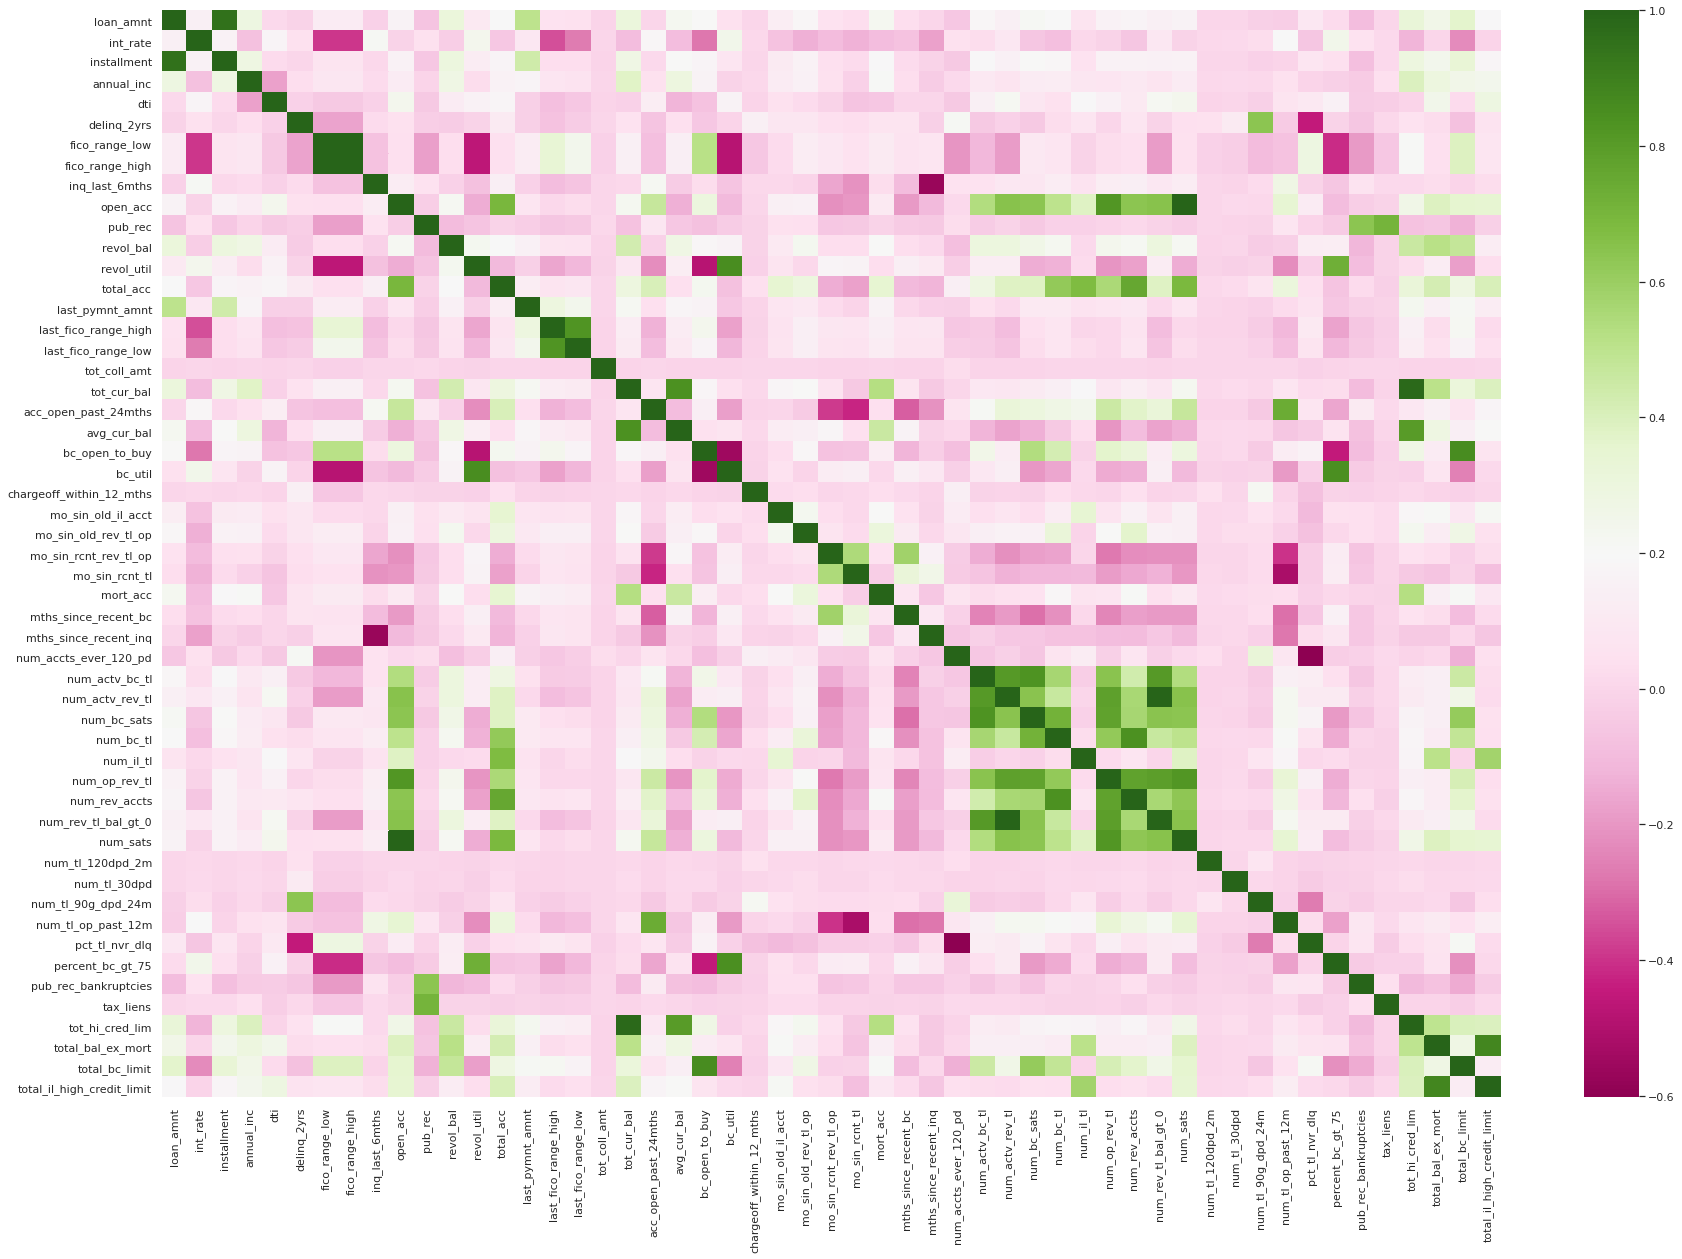

In [57]:
corr = loan.corr()
plt.figure(figsize=(30,20))
sns.heatmap(corr,cmap="PiYG")

**MODEL**

In [58]:
!pip install pydotplus

     |████████████████████████████████| 278 kB 4.2 MB/s eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=5e9a7e071c0d434bf8af2a22ffd69a9b3f2244491e800d1147d18215b50d41bd
  Stored in directory: /root/.cache/pip/wheels/1e/7b/04/7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50
Successfully built pydotplus
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [59]:
from sklearn import preprocessing

from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss,precision_score,auc,f1_score,precision_recall_curve

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree, metrics

from io import StringIO  
from IPython.display import Image  
import pydotplus

from sklearn.model_selection import train_test_split




We can use Label Encoding or One Hot Encoding.

The problem with label encoding is that it gives the categories an arbitrary ordering. The value assigned to each of the categories is random and does not reflect any inherent aspect of the category. So, If we only have two unique values for a categorical variable (such as Yes/No), then label encoding is fine, but for more than 2 unique categories, one-hot encoding is the better option.

However, due to the large number of columns originated after One-Hot Encoding, we may have to conduct Principle Component Analysis (PCA) for dimensionality reduction.

**Label Encoding**


In [60]:
count = 0

for col in loan:
    if (loan[col].dtype == 'object'):
        if len(list(loan[col].unique())) <= 2:     
            le = preprocessing.LabelEncoder()
            loan[col] = le.fit_transform(loan[col])
            count += 1
            print (col)
            
print('%d columns were label encoded.' % count)

term
loan_status
disbursement_method
3 columns were label encoded.


In [61]:
#One-Hot

data = loan.drop(["loan_status"], axis=1)
data = pd.get_dummies(data)

In [62]:
import gc

del df
gc.collect()

13246

**Model Selection**

We are now ready to build some models. The following would be our approach for building and selecting the best model:

*Building following models and checking for their accuracy and f1 score for the clean dataset. Then trying hyperparameter tuning for the models to improve its efficieny.*

1. RandomForestClassifier
2. Logistic Regression
3. Decision Trees


In [63]:
#define X and y
X = data
loan = loan['loan_status']
y = loan

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [64]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy=0.5)
x_train_r, y_train_r = undersample.fit_sample(X_train, y_train)

In [65]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(x_train_r)
X_test_scaled = scaler.transform(X_test)

In [66]:
classifiers = [LogisticRegression(C = 0.0001,random_state=1), 
               RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1), 
               tree.DecisionTreeClassifier(criterion ='gini', random_state = 1, max_depth  = 3 )]

In [67]:
del loan
gc.collect()

60

In [68]:
class_names=['Fully Paid','Default']
def conf_matrix(cm):
    fig, axes = plt.subplots(figsize=(3,3))
    np.set_printoptions(precision=2)
    cmap=plt.cm.Blues
    ax = sns.heatmap(cm, annot=True, cmap='Blues');
    ax.set_ylabel('True Label')
    ax.set_xlabel('Predicted Label')
    ax.axis('equal')
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    #Normalized
    fig, axes = plt.subplots(figsize=(2,2))
    cm = cm.astype('float')/cm.sum(axis=1)
    cmap=plt.cm.Blues
    ax = sns.heatmap(cm, annot=True, cmap='Greens');
    ax.set_ylabel('True Label')
    ax.set_xlabel('Predicted Label')
    ax.axis('equal')
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    plt.show()



Classifier: LogisticRegression
Classification Report: 
 {}
               precision    recall  f1-score   support

           0       0.81      0.88      0.84     58726
           1       0.97      0.95      0.96    237087

    accuracy                           0.93    295813
   macro avg       0.89      0.91      0.90    295813
weighted avg       0.94      0.93      0.94    295813



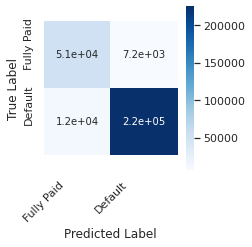

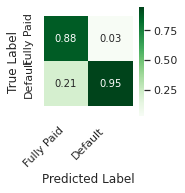



Classifier: RandomForestClassifier
Classification Report: 
 {}
               precision    recall  f1-score   support

           0       0.85      0.93      0.89     58726
           1       0.98      0.96      0.97    237087

    accuracy                           0.95    295813
   macro avg       0.91      0.94      0.93    295813
weighted avg       0.95      0.95      0.95    295813



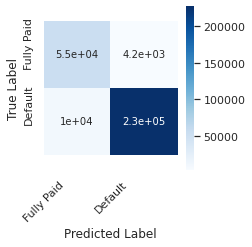

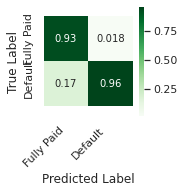



Classifier: DecisionTreeClassifier
Classification Report: 
 {}
               precision    recall  f1-score   support

           0       0.77      0.94      0.85     58726
           1       0.99      0.93      0.96    237087

    accuracy                           0.93    295813
   macro avg       0.88      0.94      0.90    295813
weighted avg       0.94      0.93      0.94    295813



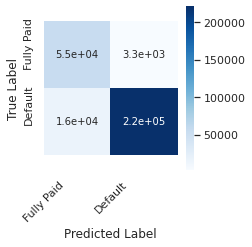

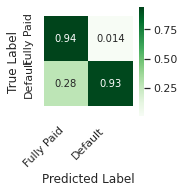

In [69]:
result_table = pd.DataFrame(columns=['classifiers','accuracy','precision', 'fpr','tpr','auc'])
model_li = []
for i,cls in enumerate(classifiers):
    if (i==0):
        model = cls.fit(X_train_scaled, y_train_r)
        y_pred = model.predict(X_test_scaled)
        yproba = model.predict_proba(X_test_scaled)[::,1]
        model_li.append(model)
    else:
        model = cls.fit(x_train_r, y_train_r)
        y_pred = model.predict(X_test)
        yproba = model.predict_proba(X_test)[::,1]
        model_li.append(model)

    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    tn,fp,fn,tp=confusion_matrix(y_test,y_pred).ravel()
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'accuracy':accuracy_score(y_test, y_pred),
                                        'precision':precision_score(y_test,y_pred),
                                        'f1_score':f1_score(y_test, y_pred, average='weighted'),
                                        'fpr':fpr, 
                                        'tpr':tpr,
                                        'tn':tn,
                                        'fp':fp,
                                        'fn':fn,
                                        'tp':tp,
                                        'auc':auc
                                        }, ignore_index=True)
    
    
    print("\n\nClassifier:", cls.__class__.__name__)
    print("Classification Report: \n {}\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix(cm)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

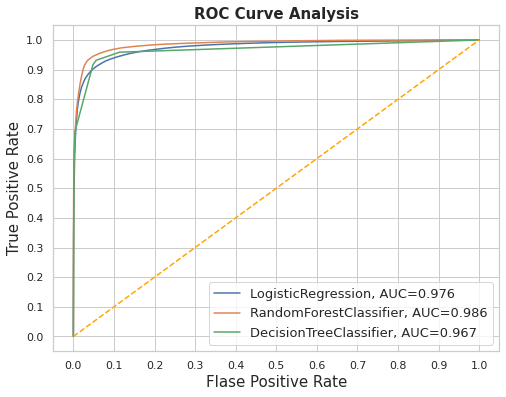

In [73]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show(fig)

In [71]:
result_table.drop(['fpr','tpr'],axis=1).T

classifiers,LogisticRegression,RandomForestClassifier,DecisionTreeClassifier
accuracy,0.934421,0.952129,0.934073
precision,0.968868,0.981902,0.985237
auc,0.975525,0.985533,0.967387
f1_score,0.935401,0.952957,0.936411
fn,12172.000000,9975.000000,16192.000000
fp,7227.000000,4186.000000,3310.000000
tn,51499.000000,54540.000000,55416.000000
tp,224915.000000,227112.000000,220895.000000


30


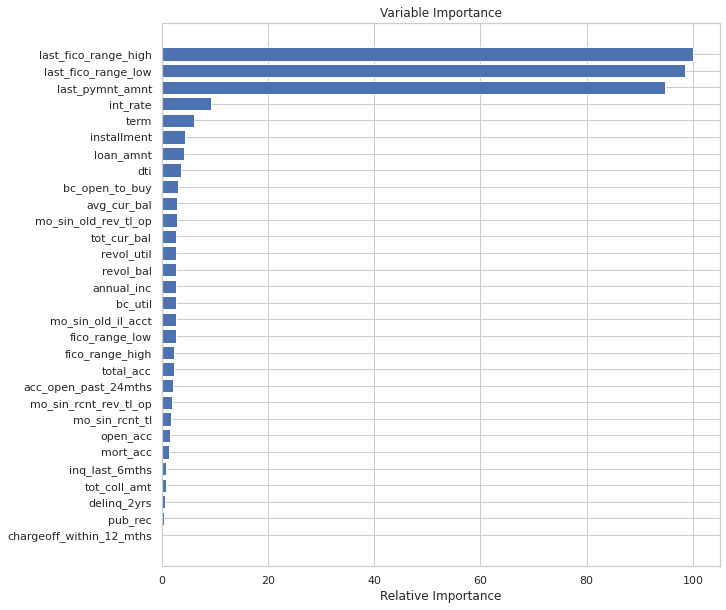

In [72]:
#RAndom Forst Feature importance
feature_importance = model_li[1].feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]
pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# **CONCLUSION**


Three different models were used to predict Defaulters. As expected Random Classifier perfomed the best followed by Logistic Regreesion and Decision Tree.

Though it was assumed initilaly Decision Tree would out perform Logical Regression based on the high number of features available. It is important to note that the Default Prediction were the main criteria for the performance here since we would like to avoid a single default loan upsetting the profits gained by several fully paid loans. So as per this criteria Forest Tree performed the best followed by Decision Tree and Logistic Regression. 



FUTURE WORKUPON:

Many things can still be improved in the models as rigorous hyperparameter tuning has not been performed due to lack of time and memory. Though basic level of parameter search was performed for better performance of models.
We could also try to reduce features to see how the models will perform with lesser features.

Ideas to Work: A new parameter could be introduced which could take in consideration the profits and loss from the sets of loan applicants and then by providing a risk factor on the net profit we could use it to approve lenders for better risk management from a list of several applicants to minimize loss.

> # 